<a href="https://colab.research.google.com/github/Ldoun/korean_child_speech_rec/blob/main/ETRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/My Drive/ERTI/10_voice_download_5_child_Korean.zip' -d '/content/pcm'

In [ ]:
!mv '/content/pcm' '/content/drive/My Drive/ERTI/'

mv: cannot stat '/content/pcm': No such file or directory


#음성 테스트

In [ ]:
import librosa
import wave
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
# The parameters are prerequisite information. More specifically,
# channels, bit_depth, sampling_rate must be known to use this function.
def pcm2wav( pcm_file, wav_file, channels=1, bit_depth=16, sampling_rate=16000 ):

    # Check if the options are valid.
    if bit_depth % 8 != 0:
        raise ValueError("bit_depth "+str(bit_depth)+" must be a multiple of 8.")
        
    # Read the .pcm file as a binary file and store the data to pcm_data
    with open( pcm_file, 'rb') as opened_pcm_file:
        pcm_data = opened_pcm_file.read();
        
        obj2write = wave.open( wav_file, 'wb')
        obj2write.setnchannels( channels )
        obj2write.setsampwidth( bit_depth // 8 )
        obj2write.setframerate( sampling_rate )
        obj2write.writeframes( pcm_data )
        obj2write.close()

pcm2wav( '/content/0001_M1/G0001_M1_OFC/G0001_M1_OFC_001.pcm', 'sample_001.wav', 1, 16, 16000 )

In [ ]:
y, sr = librosa.load('sample_001.wav')

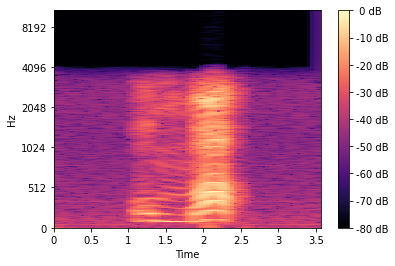

In [ ]:
stft_result = librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=512)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='mel', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

In [ ]:
from playsound import playsound
playsound('/content/sample_001.wav')

ValueError: ignored

In [ ]:
!pip install playsound

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

song = AudioSegment.from_wav("sample_001.wav")
play(song)

In [ ]:
!pip install pydub

In [ ]:
# Needed imports
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

In [ ]:
# Load the file on an object
data = wavfile.read('sample_001.wav')

# Separete the object elements
framerate = data[0]
sounddata = data[1]
time      = np.arange(0,len(sounddata))/framerate

# Show information about the object
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

Sample rate: 16000 Hz
Total time: 1.7793125 s


In [ ]:
# Generate a player for mono sound
Audio(sounddata,rate=framerate)

#음성 pcm-> wav